# 

## Conhecendo a base de dados

In [2]:
import pandas as pd

In [11]:
CSV_URL = 'https://github.com/alura-cursos/pandas-conhecendo-a-biblioteca/blob/main/base-de-dados/aluguel.csv'

In [12]:
df_aluguel = pd.read_csv(CSV_URL, sep=';')

In [13]:
df_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [14]:
df_aluguel.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [15]:
type(df_aluguel)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [16]:
df_aluguel.shape

(32960, 9)

In [17]:
df_aluguel.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [18]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [19]:
df_aluguel[['Tipo', 'Valor', 'Quartos']].head()

,Tipo,Valor,Quartos
0,Quitinete,1700.0,1
1,Casa,7000.0,2
2,Conjunto Comercial/Sala,5200.0,0
3,Apartamento,800.0,1
4,Apartamento,800.0,1


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [20]:
df_aluguel_grp_tipo_valor = df_aluguel.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')

<Axes: ylabel='Tipo'>

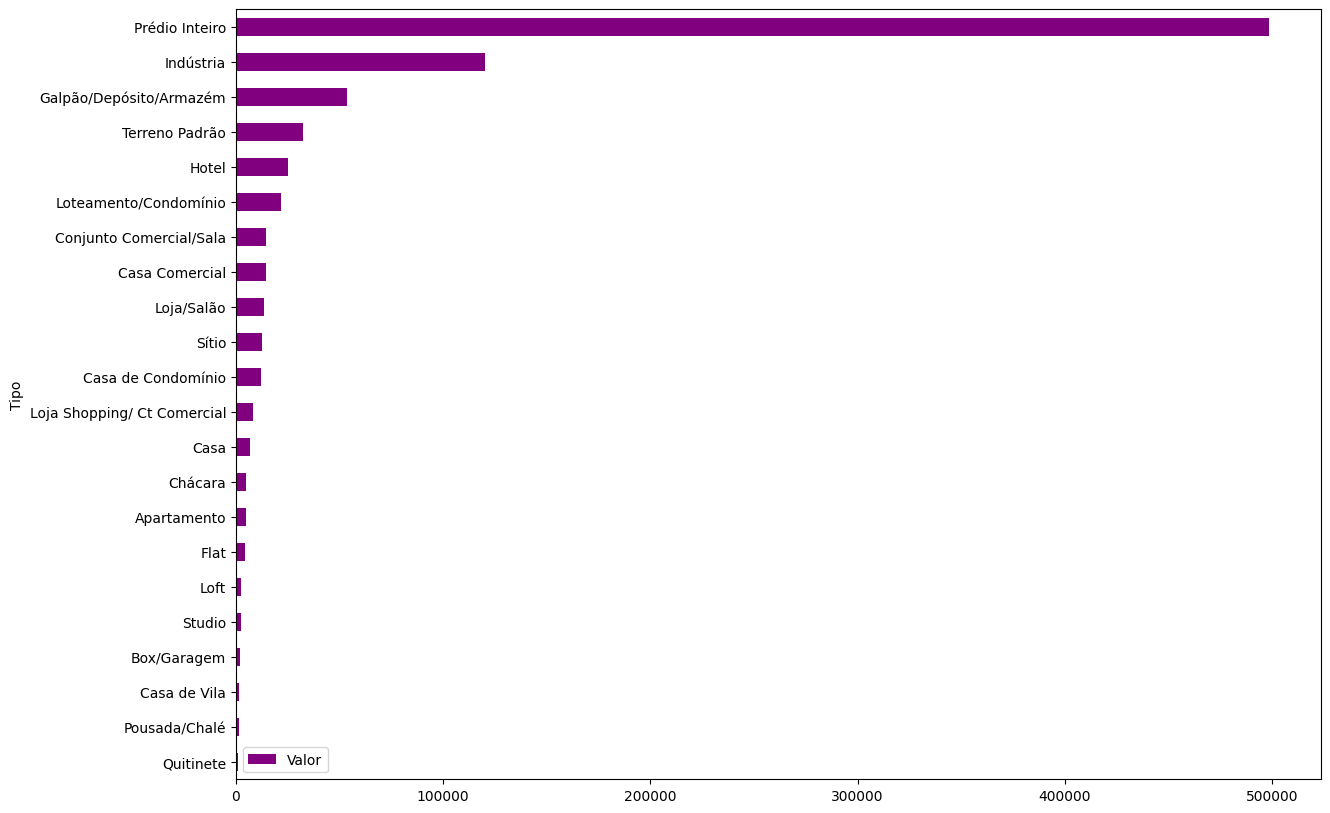

In [21]:
df_aluguel_grp_tipo_valor.plot(kind='barh', figsize=(14, 10), color='purple')


## Removendo os imóveis comerciais

In [22]:
columns_comercial = [
    'Conjunto Comercial/Sala',
    'Prédio Inteiro',
    'Loja/Salão',
    'Galpão/Depósito/Armazém',
    'Casa Comercial',
    'Terreno Padrão',
    'Loja Shopping/ Ct Comercial',
    'Box/Garagem',
    'Chácara',
    'Loteamento/Condomínio',
    'Sítio',
    'Pousada/Chalé',
    'Hotel',
    'Indústria'
]

In [26]:
df_aluguel = df_aluguel.query('@columns_comercial not in Tipo')

In [29]:
df_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [31]:
df_aluguel_grp_residencial = df_aluguel.groupby('Tipo').mean()[['Valor']].sort_values('Valor')

<ipython-input-31-c3ade7c52fb1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aluguel_grp_residencial = df_aluguel.groupby('Tipo').mean()[['Valor']].sort_values('Valor')


<Axes: ylabel='Tipo'>

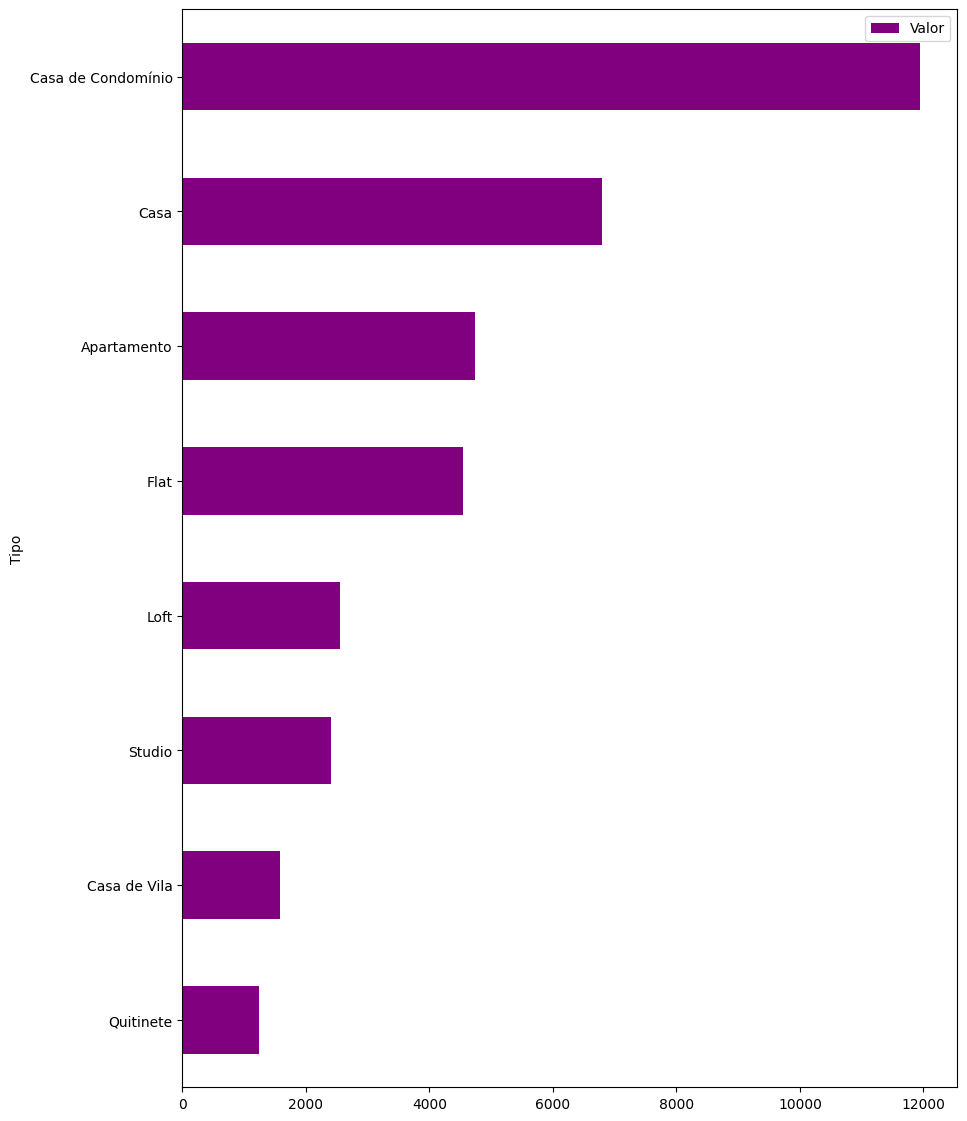

In [32]:
df_aluguel_grp_residencial.plot(kind='barh', figsize=(10, 14), color='purple')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [37]:
df_aluguel['Tipo'].value_counts(normalize=True)

Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: Tipo, dtype: float64

### **Selecionando apenas os imóveis do tipo apartamento**

In [45]:
df_apartamento = df_aluguel.query('Tipo == "Apartamento"').drop('Tipo', axis=1)

In [46]:
df_apartamento.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

In [47]:
df_apartamento.isnull().sum()

Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [49]:
df_apartamento = df_apartamento.fillna(0)

In [50]:
df_apartamento.isnull().sum()

Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [54]:
df_apartamento.query('Valor == 0 | Condominio == 0').index

Int64Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,
              292,
            ...
            32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708,
            32809],
           dtype='int64', length=752)

In [55]:
df_apartamento.drop(df_apartamento.query('Valor == 0 | Condominio == 0').index, inplace=True, axis=0)

In [56]:
df_apartamento.query('Valor == 0 | Condominio == 0')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [58]:
selecao_1 = (df_apartamento['Quartos'] == 1) & (df_apartamento['Valor'] < 1200)

In [59]:
df_apartamento[selecao_1].head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [61]:
selecao_2 = (df_apartamento['Quartos'] == 2) & (df_apartamento['Valor'] < 3000) & (df_apartamento['Area'] > 70)

In [62]:
df_apartamento[selecao_2].head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
57,Recreio dos Bandeirantes,2,1,2,83,1600.0,1160.0,157.0
67,Maracanã,2,0,0,86,1800.0,600.0,82.0


## Salvando os dados

In [64]:
df_apartamento.to_csv('df-apartamento.csv', index=False, sep=';')

In [65]:
pd.read_csv('df-apartamento.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Manipulando os dados

## Criando colunas numéricas

In [68]:
df_aluguel.fillna(0, inplace=True)

In [69]:
df_aluguel['Valor Mes'] = df_aluguel['Valor'] + df_aluguel['Condominio']

In [70]:
df_aluguel['Valor Ano'] = df_aluguel['Valor Mes'] * 12 + df_aluguel['IPTU']

In [71]:
df_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Mes,Valor Ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,14400.0


## Criando colunas categóricas